
# Project: 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#CA">Cohort Analysis</a></li>    
<li><a href="#rfm">RFM</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This Dataset is provided by [KPMG](https://www.theforage.com/virtual-internships/theme/m7W4GMqeT3bh9Nb2c/KPMG-Data-Analytics-Virtual-Internship) virtual Internship for data analysis. 

> Task :

- Perform Cohort Analysis on the Transactions Sheet provided in the Dataset to monitor and  understand Customer Retention Rate
- Perform Customer Segmentation Using K-Meann Clustering and RFM analysis 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loading Data set
path = r'D:\My Folders\Courses\Datasets\KPMG VI\KPMG_VI_New_raw_data_update_final2.xlsx'
df = pd.read_excel(path, sheet_name = 'Transactions')
df.head().T

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head().T

,0,1,2,3,4
transaction_id,1,2,3,4,5
product_id,2,3,37,88,78
customer_id,2950,3120,402,3135,787
transaction_date,2017-02-25 00:00:00,2017-05-21 00:00:00,2017-10-16 00:00:00,2017-08-31 00:00:00,2017-10-01 00:00:00
online_order,0.0,1.0,0.0,0.0,1.0
order_status,Approved,Approved,Approved,Approved,Approved
brand,Solex,Trek Bicycles,OHM Cycles,Norco Bicycles,Giant Bicycles
product_line,Standard,Standard,Standard,Standard,Standard
product_class,medium,medium,low,medium,medium
product_size,medium,large,medium,medium,large


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

transaction_id                 0
product_id                     0
customer_id                    0
transaction_date               0
online_order                 360
order_status                   0
brand                        197
product_line                 197
product_class                197
product_size                 197
list_price                     0
standard_cost                197
product_first_sold_date      197
Unnamed: 13                20000
Unnamed: 14                20000
Unnamed: 15                20000
Unnamed: 16                20000
Unnamed: 17                20000
Unnamed: 18                20000
Unnamed: 19                20000
Unnamed: 20                20000
Unnamed: 21                20000
Unnamed: 22                20000
Unnamed: 23                20000
Unnamed: 24                20000
Unnamed: 25                20000
dtype: int64

In [7]:
#Dropping Unnamed columns
df = df.drop(df.loc[:, 'Unnamed: 13':'Unnamed: 25'].columns, axis = 1)
df.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0


In [9]:
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [10]:
df.describe(include='object')

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [12]:
df.drop('product_first_sold_date', axis=1, inplace=True)

In [13]:
df.nunique()

transaction_id      20000
product_id            101
customer_id          3494
transaction_date      364
online_order            2
order_status            2
brand                   6
product_line            4
product_class           3
product_size            3
list_price            296
standard_cost         103
dtype: int64

In [42]:
df.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

<a id='wrangling'></a>
## Data Wrangling & Cleaning


### General Properties

In [14]:
df.shape

(20000, 12)

### Data Cleaning (Replace this with more specific notes!)

> For Cohort Analysis and ranking of Recency, Frequency and 
- we create the cohort : the monthly cohort based on the first purchase date (calculated per customer) 
- order_month variable : the truncated month of the purchase date.

> For Recency, Frequency, and Monetary (RFM) Segmentation:
- We need to get the most recent and oldest dates
- Frequency: How many times the customer purchased in the last 12 months
- Monetary Value: How much has the customer spent in the last 12 months

<a id='CA'></a>
# Cohort Analysis

In [15]:
#creating Order month column
df['order_month'] =df['transaction_date'].dt.month
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,order_month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,8
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10


In [16]:
#creating Cohort based on the first purchase date (calculated per customer)
df['cohort'] = df.groupby('customer_id')['transaction_date'].transform('min').dt.month
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,order_month,cohort
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2,2
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,5,1
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,10,1
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,8,2
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10,1


In [17]:
#aggregate the data per cohort and order_month 
#count the number of unique customers in each group
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customer =('customer_id', 'nunique')).reset_index(drop = False)
df_cohort.head()

,cohort,order_month,n_customer
0,1,1,1354
1,1,2,486
2,1,3,508
3,1,4,509
4,1,5,502


In [30]:
#indicating the Number of periods which is the difference between the cohort month and month of the purchase
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort)


In [32]:
#creating a pivot table 
cohort_pivoted = df_cohort.pivot_table(index = 'cohort', columns = 'period_number', values = 'n_customer')
cohort_pivoted

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
1,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
3,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
4,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
5,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
6,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
7,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
8,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#retention matrix, divide the values each row by the row's first value, 
# which is actually the cohort size — all customers who made their first purchase in the given month.
# divide by the cohort size (month 0) to obtain retention as %
cohort_size = cohort_pivoted.iloc[:,0]
retention_matrix = cohort_pivoted.divide(cohort_size, axis = 0)

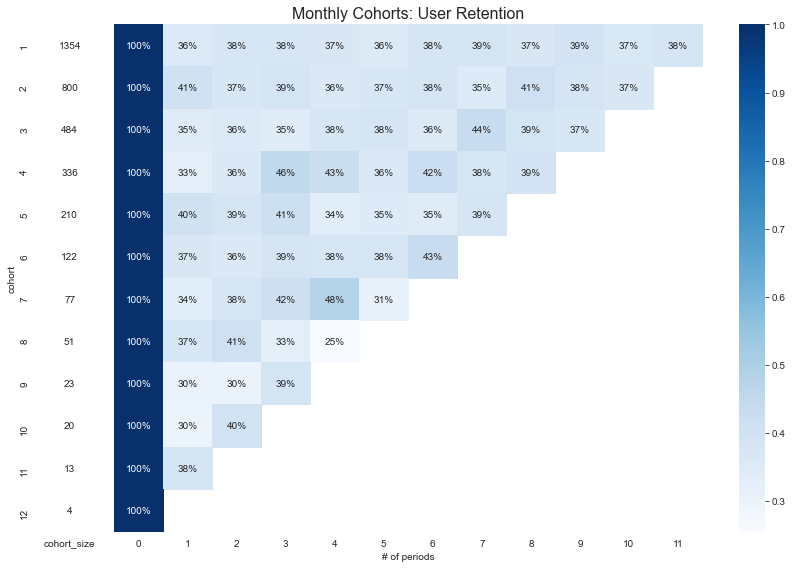

In [41]:
import matplotlib.colors as mcolors
sb.set_style("white")
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

# retention matrix
sb.heatmap(retention_matrix, 
            mask=retention_matrix.isnull(), 
            annot=True, 
            fmt='.0%', 
            cmap='Blues', 
            ax=ax[1])
ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
ax[1].set(xlabel='# of periods',
          ylabel='')

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
white_cmap = mcolors.ListedColormap(['white'])
sb.heatmap(cohort_size_df, 
            annot=True, 
            cbar=False, 
            fmt='g', 
            cmap=white_cmap, 
            ax=ax[0])

fig.tight_layout()

## Recency, Frequency, and Monetary (RFM) Segmentation

In [46]:
import datetime as dt
#Calculat year date range from latest data
end_date = df['transaction_date'].max()


# Filter 1-year data range from original df
start_date = end_date -pd.to_timedelta(364, unit='d')
df_rfm = df[(df['transaction_date'] >= start_date) & (df['transaction_date'] <= end_date)]


# Create hypothetical snapshot date
snapshot_date = end_date + dt.timedelta(days=1)


# Calculate Recency, Frequency and Monetary value for each customer
df_rfm = df_rfm.groupby(['customer_id']).agg({
    'transaction_date': lambda x: (snapshot_date - x.max()).days,
    'transaction_id': 'count',
    'list_price': 'sum'})


# Rename the columns
df_rfm.rename(columns={'transaction_date': 'Recency',
                       'transaction_id': 'Frequency',
                       'list_price': 'MonetaryValue'}, inplace=True)

In [47]:
df_rfm.head()

,Recency,Frequency,MonetaryValue
customer_id,,,
1,8,11,9084.45
2,129,3,4149.07
3,103,8,9888.23
4,196,2,1047.72
5,17,6,5903.20


# Building RFM Segments

In [50]:
# Obtain quantile of each customer
def get_quantile(df, column, start_n_quantiles, end_n_quantiles, step=1):

    category_label = range(start_n_quantiles, end_n_quantiles, step)
    
    quantiles = pd.qcut(df[column], q=abs(
        end_n_quantiles - start_n_quantiles), labels=category_label)

    df = df.assign(name=quantiles.values)

    new_column_name = column + '_Q'

    return df.rename(columns={"name": new_column_name})

In [51]:
df_rfm_quantile = df_rfm.copy()

df_rfm_quantile = get_quantile(df_rfm_quantile, 'Recency', 4, 0, -1)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Frequency', 1, 5)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'MonetaryValue', 1, 5)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q
customer_id,,,,,,
1,8,11,9084.45,4,4,4
2,129,3,4149.07,1,1,1
3,103,8,9888.23,1,4,4
4,196,2,1047.72,1,1,1
5,17,6,5903.20,4,2,2


#### Quantile Score

In [57]:

# Concatenate RFM quartile values
def join_rfm(x): 
    return str(x['Recency_Q']) + str(x['Frequency_Q']) + str(x['MonetaryValue_Q'])

In [58]:
# adding RFM segment column
df_rfm_quantile['RFM_Segment'] = df_rfm_quantile.apply(join_rfm, axis=1)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment
customer_id,,,,,,,
1,8,11,9084.45,4,4,4,4.04.04.0
2,129,3,4149.07,1,1,1,1.01.01.0
3,103,8,9888.23,1,4,4,1.04.04.0
4,196,2,1047.72,1,1,1,1.01.01.0
5,17,6,5903.20,4,2,2,4.02.02.0


In [59]:
# Calculate RFM_Score
df_rfm_quantile['RFM_Score'] = df_rfm_quantile[['Recency_Q','Frequency_Q','MonetaryValue_Q']].sum(axis=1)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment,RFM_Score
customer_id,,,,,,,,
1,8,11,9084.45,4,4,4,4.04.04.0,12
2,129,3,4149.07,1,1,1,1.01.01.0,3
3,103,8,9888.23,1,4,4,1.04.04.0,9
4,196,2,1047.72,1,1,1,1.01.01.0,3
5,17,6,5903.20,4,2,2,4.02.02.0,8


In [60]:
# Summary Metrics per RFM score
df_rfm_quantile.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           164.3       2.6        2547.6   337
4            99.9       3.5        3688.6   301
5            76.2       4.1        4211.9   354
6            62.2       4.7        4966.6   483
7            51.0       5.4        5935.6   433
8            39.8       6.0        6614.1   387
9            39.4       6.8        7875.8   380
10           39.0       8.0        8992.8   311
11           24.2       8.8       10289.6   292
12            8.7       9.4       10991.1   216

#### Ranking Customers 

In [61]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return '1.Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return '2.Silver'
    else:
        return '3.Bronze'

In [63]:
df_rfm_quantile['Seg_Rank'] = df_rfm_quantile.apply(segment_me, axis=1)

df_rfm_custom_segment = df_rfm_quantile.groupby('Seg_Rank').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

df_rfm_custom_segment

Recency Frequency MonetaryValue      
            mean      mean          mean count
Seg_Rank                                      
1.Gold      30.0       8.1        9314.6  1199
2.Silver    57.0       5.0        5443.3  1657
3.Bronze   133.9       3.0        3085.9   638

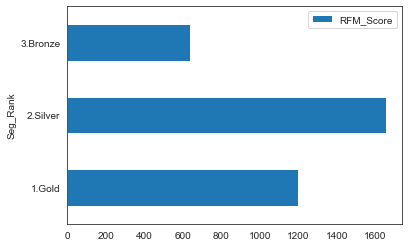

In [77]:
df_rfm_quantile.groupby('Seg_Rank')['RFM_Score'].count().plot(kind = 'barh', legend = True);

# preparing Data For K-means Clustering 

In [48]:
#reducing Skewness of variables
from scipy import stats
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sb.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

C:\Users\Amira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Amira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: 1.5701993167584876, : SkewtestResult(statistic=27.848513636801318, pvalue=1.1227192874635828e-170)
Frequency's: Skew: 0.42358306983068394, : SkewtestResult(statistic=9.834544685967973, pvalue=7.992833084131459e-23)
MonetaryValue's: Skew: 0.553008577939628, : SkewtestResult(statistic=12.522569748968767, pvalue=5.6186110681271234e-36)


C:\Users\Amira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


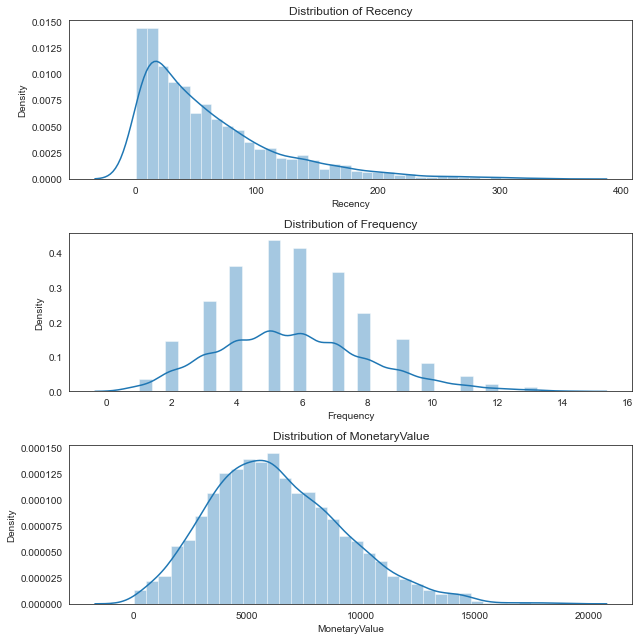

In [49]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm,'MonetaryValue')

plt.tight_layout();

C:\Users\Amira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Amira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Amira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Recency's: Skew: -0.7572625289823296, : SkewtestResult(statistic=-16.381053644927484, pvalue=2.6117931958404685e-60)
Frequency's: Skew: -0.8730381451678282, : SkewtestResult(statistic=-18.36603741849833, pvalue=2.4570937865262313e-75)
MonetaryValue's: Skew: -1.5179134716879916, : SkewtestResult(statistic=-27.25592030500434, pvalue=1.413926533709512e-163)


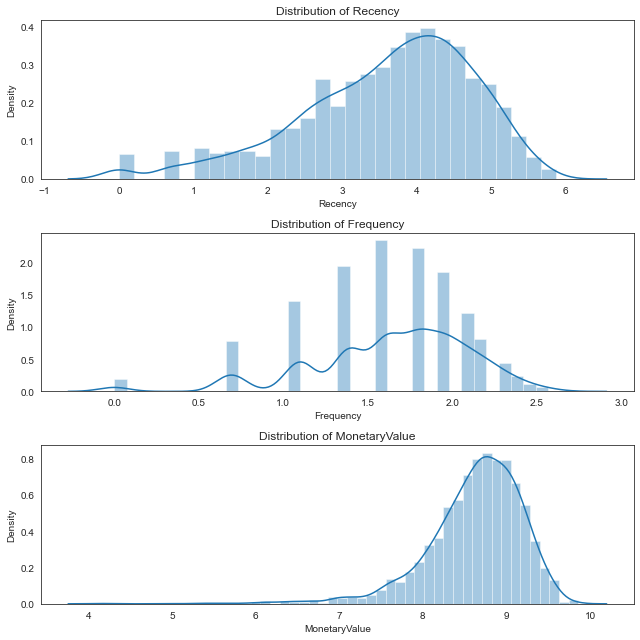

In [78]:
# Transform skewed data with log tranasformation
df_rfm_log = np.log(df_rfm)

# Check for skewness after log transformation
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'MonetaryValue')

plt.tight_layout()

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [80]:
# Scaling data
scaler = StandardScaler()
scaler.fit(df_rfm_log)
df_rfm_normal = scaler.transform(df_rfm_log)

df_rfm_normal = pd.DataFrame(df_rfm_normal, index=df_rfm_log.index, columns=df_rfm_log.columns)

# Check result after standardising
df_rfm_normal.describe().round(3)

,Recency,Frequency,MonetaryValue
count,3494.000,3494.000,3494.000
mean,0.000,0.000,0.000
std,1.000,1.000,1.000
min,-3.101,-3.552,-7.796
25%,-0.618,-0.567,-0.479
50%,0.169,0.306,0.145
75%,0.726,0.638,0.677
max,1.942,2.131,2.131


In [81]:
#finding the Optimal no of clusters
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values of Inertia and Silhouette Score.
        Lineplot of values of Inertia and Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
    inertia = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
        inertia_score = round(kmeans.inertia_, 2)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]), 
            inertia_score, 
            (inertia[n_clusters - start] - inertia[n_clusters - start - 1])))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sb.pointplot(x=n_clu, y=inertia)

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sb.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score(SS): 0.384, SS Delta: 0.0, Inertia: 6195.02, Inertia Delta: 0.0
No. Clusters: 3, Silhouette Score(SS): 0.333, SS Delta: -0.05099999999999999, Inertia: 4553.03, Inertia Delta: -1641.9900000000007
No. Clusters: 4, Silhouette Score(SS): 0.318, SS Delta: -0.015000000000000013, Inertia: 3558.27, Inertia Delta: -994.7599999999998
No. Clusters: 5, Silhouette Score(SS): 0.315, SS Delta: -0.0030000000000000027, Inertia: 3011.52, Inertia Delta: -546.75
No. Clusters: 6, Silhouette Score(SS): 0.306, SS Delta: -0.009000000000000008, Inertia: 2571.94, Inertia Delta: -439.5799999999999
No. Clusters: 7, Silhouette Score(SS): 0.29, SS Delta: -0.016000000000000014, Inertia: 2291.28, Inertia Delta: -280.65999999999985
No. Clusters: 8, Silhouette Score(SS): 0.298, SS Delta: 0.008000000000000007, Inertia: 2044.02, Inertia Delta: -247.26000000000022
No. Clusters: 9, Silhouette Score(SS): 0.284, SS Delta: -0.014000000000000012, Inertia: 1870.4, Inertia Delta: -173.6199999999

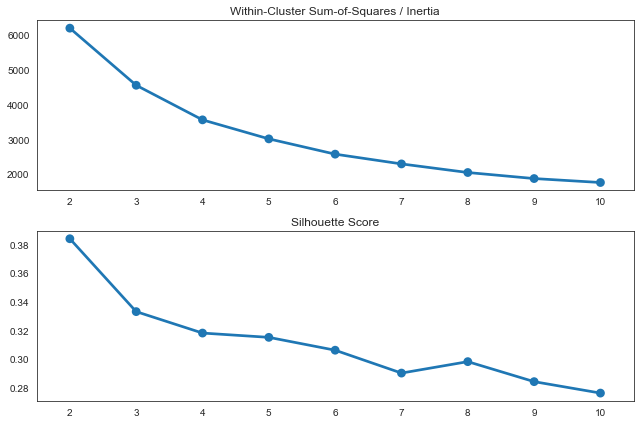

In [82]:
optimal_kmeans(df_rfm_normal)

In [83]:
#Implementin K-means clustering
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        normalised_df_rfm : dataframe. Normalised rfm dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        original_df_rfm : dataframe. Original rfm dataset to assign the labels to.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sb.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

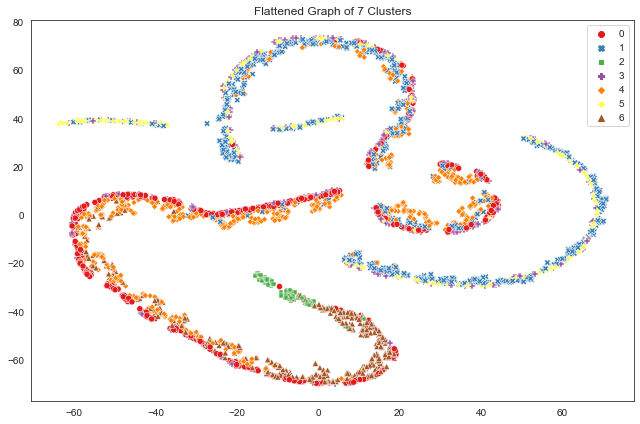

In [84]:
#as suggested by the Silhoutte Score the optimal # of clusters is 7
plt.figure(figsize=(9, 6))

df_rfm_k7 = kmeans(df_rfm_normal, 7, df_rfm)
plt.tight_layout()

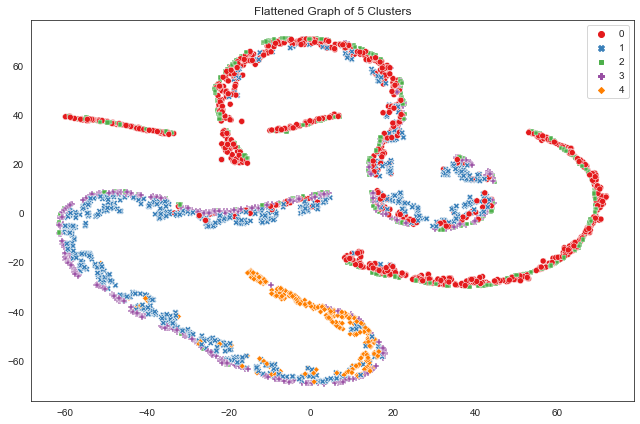

In [86]:
# Clusters of 5 
plt.figure(figsize=(9, 6))

df_rfm_k5 = kmeans(df_rfm_normal, 5, df_rfm)
plt.tight_layout()

In [93]:
#Calculating Summary Metrics for the 7 clusters
df_rfm_k7.groupby('Cluster').agg({'Recency': 'mean', 'Frequency':'mean', 'MonetaryValue':('mean','count')}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          20.2       4.7        4866.8   591
1          66.3       7.3        8368.5   815
2         146.5       1.6         966.1   102
3           3.4       6.5        7216.4   261
4         101.2       4.8        5257.6   738
5          18.0       8.7       10072.7   521
6         107.5       2.8        2896.7   466

<a id='conclusions'></a>
## Conclusions

> In this Note Book I've performed **Cohort Analysis** based on **Time**, Customers were divided into acquisition cohorts depending on the month of their first purchase.

**Objectives of the Cohort Analysis**:

 - Finding the percentage of active customers compared to the total number of customers after each month: Customer Segmentations (Done Through the Heat Map)
 - Interpret the retention rate:The darker the blue shades with higher values, meaning, July 2017 cohort Month in 5th Cohort Index, we see the dark blue shade with  48% which means that 48% of cohorts that signed in July 2017 were active 5 months later

>  Also Performed **RFM Analysis** (Recency, frecuency and Monetary) on the same dataset to perform Customer Segmentation using K-means Clustering Unsupervised Machine learning Model, which resulted in 7 clusters 

Code Sources and references : 

https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

https://towardsdatascience.com/the-most-important-data-science-tool-for-market-and-customer-segmentation-c9709ca0b64a